In [29]:
import numpy as np
import pandas as pd
import wfdb
from wfdb import processing as wp

In [2]:
# Records to use

# Left bundle branch block. No normal beats!
l_records = ['109', '111', '207', '214']
# Right bundle branch block. 118, 124, 232 have no normal/L beats. 207, 212, 231 have N beats.
r_records = ['118', '124', '207', '212', '231', '232' ]
# Premature ventricular contraction. There are more records with fewer v.
v_records = ['106', '116', '119', '200', '201', '203', '207', '208' ,'210',
             '213', '214', '215', '221', '223', '228', '233']


In [38]:
def get_df(ann, keep_sym=None, rm_sym):
    """
    Get pandas df from wfdb annotation.
    
    Filter syms if want by specifying what to keep or remove.
    Only specify one of keep_sym and rm_sym.
    """
    df = pd.DataFrame({'sample':ann.sample, 'symbol':ann.symbol})
    
    if keep_sym and rm_sym:
        raise Exception('Specify either symbols to keep or remove')
    if keep_sym:
        df = df.loc[df['symbol'].isin(keep_sym)]
    elif rm_sym:
        df = df.loc[-df['symbol'].isin(rm_sym)]
    return df


SyntaxError: invalid syntax (<ipython-input-38-3f7b0484d020>, line 18)

In [40]:
# Right branch block
r = '212'

record = wfdb.rdrecord(r, pb_dir='mitdb')
ann = wfdb.rdann(r, 'atr', pb_dir='mitdb', summarize_labels=True)




In [44]:
ann.contained_labels

,label_store,symbol,description
16,16,|,Isolated QRS-like artifact
1,1,N,Normal beat
3,3,R,Right bundle branch block beat
28,28,+,Rhythm change
14,14,~,Signal quality change


In [27]:
df = get_df(ann, keep_sym=['N', 'R'])
# 923 + 1825

In [32]:
help(wp.calc_mean_hr)

Help on function calc_mean_hr in module wfdb.processing.hr:

calc_mean_hr(rr, fs=None, min_rr=None, max_rr=None, rr_units='samples')
    Compute mean heart rate in beats per minute, from a set of rr
    intervals. Returns 0 if rr is empty.
    
    Parameters
    ----------
    rr : numpy array
        Array of rr intervals.
    fs : int, or float
        The corresponding signal's sampling frequency. Required if
        'input_time_units' == 'samples'.
    min_rr : float, optional
        The minimum allowed rr interval. Values below this are excluded
        when calculating the heart rate. Units are in `rr_units`.
    max_rr : float, optional
        The maximum allowed rr interval. Values above this are excluded
        when calculating the heart rate. Units are in `rr_units`.
    rr_units : str, optional
        The time units of the input rr intervals. Must be one of:
        'samples', 'seconds'.
    
    Returns
    -------
    mean_hr : float
        The mean heart rate in bea

1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
2733     True
2734     True
2735     True
2736     True
2737     True
2738     True
2739     True
2740     True
2741     True
2742     True
2743     True
2744     True
2745     True
2746     True
2747     True
2748     True
2749     True
2750     True
2751     True
2752     True
2753     True
2754     True
2755     True
2756     True
2757     True
2758     True
2759     True
2760     True
2761     True
2762     True
Name: symbol, Length: 2748, dtype: bool

In [30]:
dir(wp)

['Comparitor',
 'XQRS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'basic',
 'benchmark_mitdb',
 'calc_mean_hr',
 'calc_rr',
 'compare_annotations',
 'compute_hr',
 'correct_peaks',
 'evaluate',
 'find_local_peaks',
 'find_peaks',
 'get_filter_gain',
 'gqrs_detect',
 'hr',
 'normalize_bound',
 'peaks',
 'qrs',
 'resample_ann',
 'resample_multichan',
 'resample_sig',
 'resample_singlechan',
 'xqrs_detect']

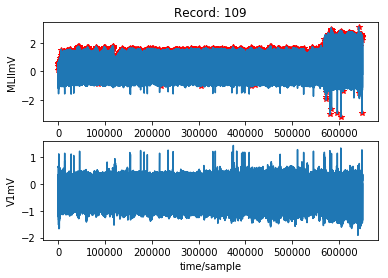

In [8]:
wfdb.plot_wfdb(record=record, annotation=ann)


In [5]:
wfdb.

Help on function plot_items in module wfdb.plot.plot:

plot_items(signal=None, ann_samp=None, ann_sym=None, fs=None, time_units='samples', sig_name=None, sig_units=None, ylabel=None, title=None, sig_style=[''], ann_style=['r*'], ecg_grids=[], figsize=None, return_fig=False)
    Subplot individual channels of signals and/or annotations.
    
    Parameters
    ----------
    signal : 1d or 2d numpy array, optional
        The uniformly sampled signal to be plotted. If signal.ndim is 1, it is
        assumed to be a one channel signal. If it is 2, axes 0 and 1, must
        represent time and channel number respectively.
    ann_samp: list, optional
        A list of annotation locations to plot, with each list item
        corresponding to a different channel. List items may be:
    
        - 1d numpy array, with values representing sample indices. Empty
          arrays are skipped.
        - list, with values representing sample indices. Empty lists
          are skipped.
        - N